In [1]:
import os
import cv2
import keras
import random
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints', 'heros', 'IMFDB_final', 'Untitled.ipynb']

In [4]:
os.listdir('heros')

['AamairKhan',
 'AkshayKumar',
 'Ali',
 'AmitabhBachchan',
 'ANR',
 'Brahmanandam',
 'KajalAgarwal',
 'KatrinaKaif',
 'M.S.Narayana']

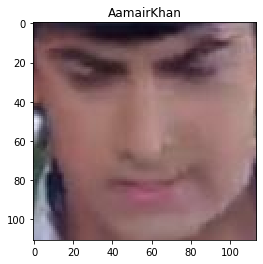

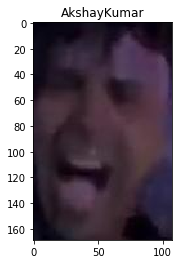

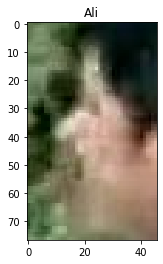

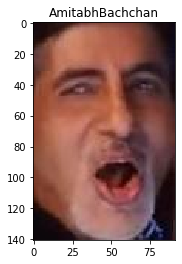

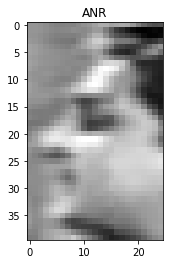

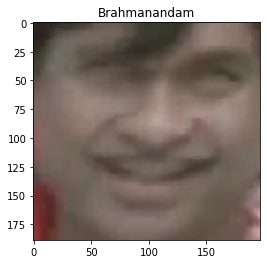

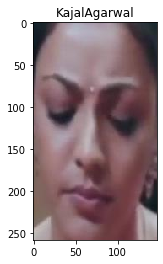

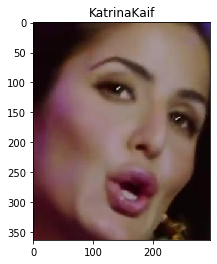

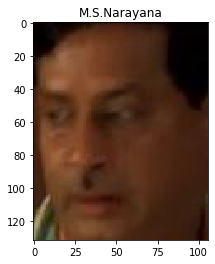

In [8]:
train_dir = "heros"
one_from_each = []
titles = []
classes = os.listdir(train_dir)
n_classes = len(classes)
for x in classes:
    unique_img_dir = train_dir + '/' + x
    temp_directory = os.listdir(unique_img_dir)
    temp_img = unique_img_dir + '/' + temp_directory[random.randint(1,10)]
    image = cv2.imread(temp_img)
    image = np.array(image)
    image = image.astype('float32')/255.0
    one_from_each.append(image)
    titles.append(x)
    
for i in range(9):
    imageshow = one_from_each[i]
    plt.imshow(imageshow[:,:,::-1])
    plt.title(titles[i])
    plt.show()

In [11]:
print(classes)
labels_dict = {0:classes[0],
               1:classes[1],
               2:classes[2],
               3:classes[3],
               4:classes[4],
               5:classes[5],
               6:classes[6],
               7:classes[7],
               8:classes[8]
              }

['AamairKhan', 'AkshayKumar', 'Ali', 'AmitabhBachchan', 'ANR', 'Brahmanandam', 'KajalAgarwal', 'KatrinaKaif', 'M.S.Narayana']


In [13]:
def load_data(directory):
    size = 150,150
    images = []
    labels = []
    
    for folder in os.listdir(directory):
        print("Loading images from : ",folder, ": ", end="")
        for file in os.listdir(directory + "/" + folder):
            img_path = directory + "/" + folder + "/" + file
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            images.append(curr_img)
            if folder == labels_dict[0]:
                current_label = 0
            elif folder == labels_dict[1]:
                current_label = 1
            elif folder == labels_dict[2]:
                current_label = 2
            elif folder == labels_dict[3]:
                current_label = 3
            elif folder == labels_dict[4]:
                current_label = 4
            elif folder == labels_dict[5]:
                current_label = 5
            elif folder == labels_dict[6]:
                current_label = 6
            elif folder == labels_dict[7]:
                current_label = 7
            elif folder == labels_dict[8]:
                current_label = 8
            labels.append(current_label)
        print("completed")
    
    images, labels = shuffle(images, labels)
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = np.array(labels)
    labels = keras.utils.to_categorical(labels, n_classes)
    
    return images, labels

In [14]:
X_train, Y_train = load_data(train_dir)

Loading images from :  AamairKhan : completed
Loading images from :  AkshayKumar : completed
Loading images from :  Ali : completed
Loading images from :  AmitabhBachchan : completed
Loading images from :  ANR : completed
Loading images from :  Brahmanandam : completed
Loading images from :  KajalAgarwal : completed
Loading images from :  KatrinaKaif : completed
Loading images from :  M.S.Narayana : completed


In [15]:
X_train.shape

(2432, 150, 150, 3)

In [17]:
Y_train.shape

(2432, 9)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size =[5,5], strides = 2, activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(256, kernel_size = [3,3], activation = "relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(n_classes, activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)    

In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_hist =  model.fit(X_train,Y_train, epochs = 25, validation_split = 0.1, batch_size = 32)

Train on 2188 samples, validate on 244 samples
Epoch 1/25
2188/2188 [==============================] - 14s 6ms/step - loss: 0.5936 - acc: 0.8044 - val_loss: 0.7240 - val_acc: 0.7705
Epoch 2/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.4814 - acc: 0.8464 - val_loss: 0.8813 - val_acc: 0.7459
Epoch 3/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.4342 - acc: 0.8579 - val_loss: 0.6955 - val_acc: 0.7910
Epoch 4/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.4008 - acc: 0.8661 - val_loss: 0.7100 - val_acc: 0.8238
Epoch 5/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.3666 - acc: 0.8752 - val_loss: 0.6710 - val_acc: 0.8074
Epoch 6/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.3027 - acc: 0.9017 - val_loss: 0.7744 - val_acc: 0.8074
Epoch 7/25
2188/2188 [==============================] - 13s 6ms/step - loss: 0.2725 - acc: 0.9077 - val_loss: 0.7391 - val_acc: 0.8033
Epoch 8/

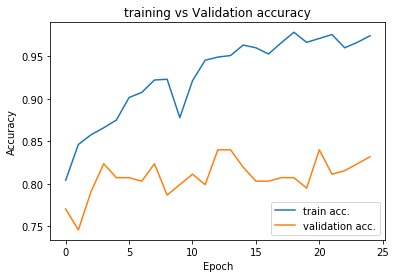

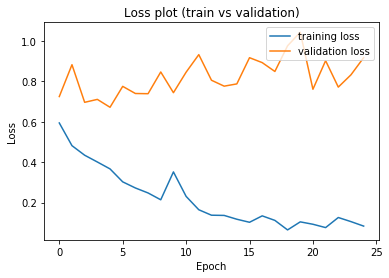

In [21]:
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title("training vs Validation accuracy")
plt.legend(['train acc.','validation acc.'], loc = 'lower right')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title("Loss plot (train vs validation)")
plt.legend(['training loss','validation loss'], loc = 'upper right')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()